In [52]:
# Instal pustaka yang diperlukan
!pip install pandas matplotlib seaborn

# Impor pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
from google.colab import files
uploaded = files.upload()

# Membaca dataset ke dalam dataframe
df = pd.read_csv('online_retail_II.csv')


Saving online_retail_II.csv to online_retail_II.csv


In [56]:
# Menampilkan informasi dasar tentang dataset
df.info()

# Mengubah tipe data 'InvoiceDate' menjadi tipe tanggal
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [60]:
# Menambahkan kolom 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['Price']

# Menghapus data yang tidak memiliki CustomerID
df = df.dropna(subset=['Customer ID'])

In [63]:
# Menentukan tanggal acuan untuk menghitung Recency
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

# Menghitung nilai Recency, Frequency, dan Monetary
# Check if 'InvoiceNo' is the correct column name,
# if not replace it with the actual column name from your DataFrame
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',  # Replace 'Invoice' with the correct column name if needed
    'TotalPrice': 'sum'
})

In [64]:
# Mengganti nama kolom
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Menampilkan data RFM
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,17,-64.68
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,5,4404.54
12350.0,310,1,334.40


In [65]:
# Memberikan skor R, F, dan M dari 1 hingga 5
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Menggabungkan skor R, F, dan M menjadi satu skor RFM
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Menampilkan data RFM dengan skor
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
Customer ID,,,,,,,
12346.0,326,17,-64.68,2,5,1,251
12347.0,2,8,5633.32,5,4,5,545
12348.0,75,5,2019.40,3,3,4,334
12349.0,19,5,4404.54,4,3,5,435
12350.0,310,1,334.40,2,1,2,212


In [66]:
# Segmentasi berdasarkan skor RFM
def segment_rfm(df):
    if df['RFM_score'] == '555':
        return 'Best Customers'
    elif df['RFM_score'] == '111':
        return 'Lost Customers'
    elif df['R_score'] == '5':
        return 'Loyal Customers'
    elif df['R_score'] == '1':
        return 'At Risk'
    else:
        return 'Others'

# Menerapkan fungsi segmentasi
rfm['Segment'] = rfm.apply(segment_rfm, axis=1)

# Menampilkan data RFM dengan segmen
rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
Customer ID,,,,,,,,
12346.0,326,17,-64.68,2,5,1,251,Others
12347.0,2,8,5633.32,5,4,5,545,Others
12348.0,75,5,2019.40,3,3,4,334,Others
12349.0,19,5,4404.54,4,3,5,435,Others
12350.0,310,1,334.40,2,1,2,212,Others


<ipython-input-67-33f60575a108>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


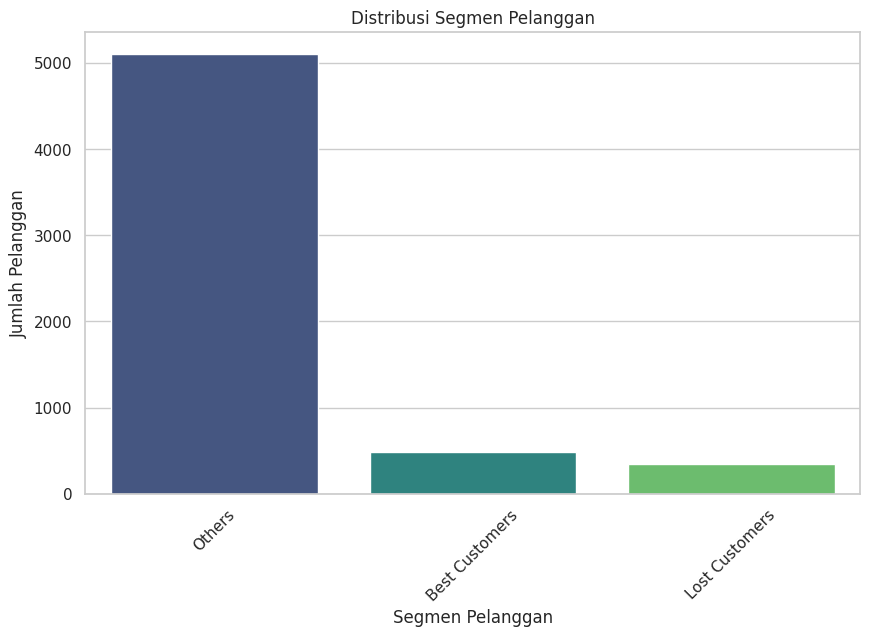

In [67]:
# Menghitung jumlah pelanggan dalam setiap segmen
segment_counts = rfm['Segment'].value_counts()

# Membuat plot batang
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribusi Segmen Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()
